In [102]:
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [103]:
file_path = '../data/Dados-Processo-tratados/todos_ensaios.csv'

df = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip')
df.groupby('ensaio').max()

,time,sensor_PT100_1,sensor_PT100_3,sensor_PT100_4,sensor_humidity_1,sensor_TH_1,sensor_humidity_2,sensor_TH_2,product_humidity,sensor_PT100_2
ensaio,,,,,,,,,,
1,4800.5,40.91,36.32,34.62,53.12,26.06,70.51,32.08,12.74,NaN
2,3420.0,34.69,33.93,31.42,78.07,21.28,84.45,28.69,17.72,-47.91
3,4800.0,41.10,54.40,55.13,36.45,33.41,61.56,50.34,12.80,23.50
4,3480.0,37.32,35.46,35.55,60.89,28.84,79.66,33.73,14.92,17.78
5,4020.0,38.17,30.77,30.44,57.08,28.32,79.46,29.35,13.90,16.01
6,4015.5,42.97,48.26,49.02,55.43,28.32,73.54,41.96,10.64,20.62
7,5220.3,39.25,52.47,46.67,52.24,30.79,64.64,40.06,11.10,20.11
8,3240.2,41.91,31.73,31.70,72.05,21.64,82.49,30.18,23.83,12.46
9,4020.0,36.26,33.56,33.53,61.30,25.75,75.19,31.57,12.67,3.09


# Variables relations

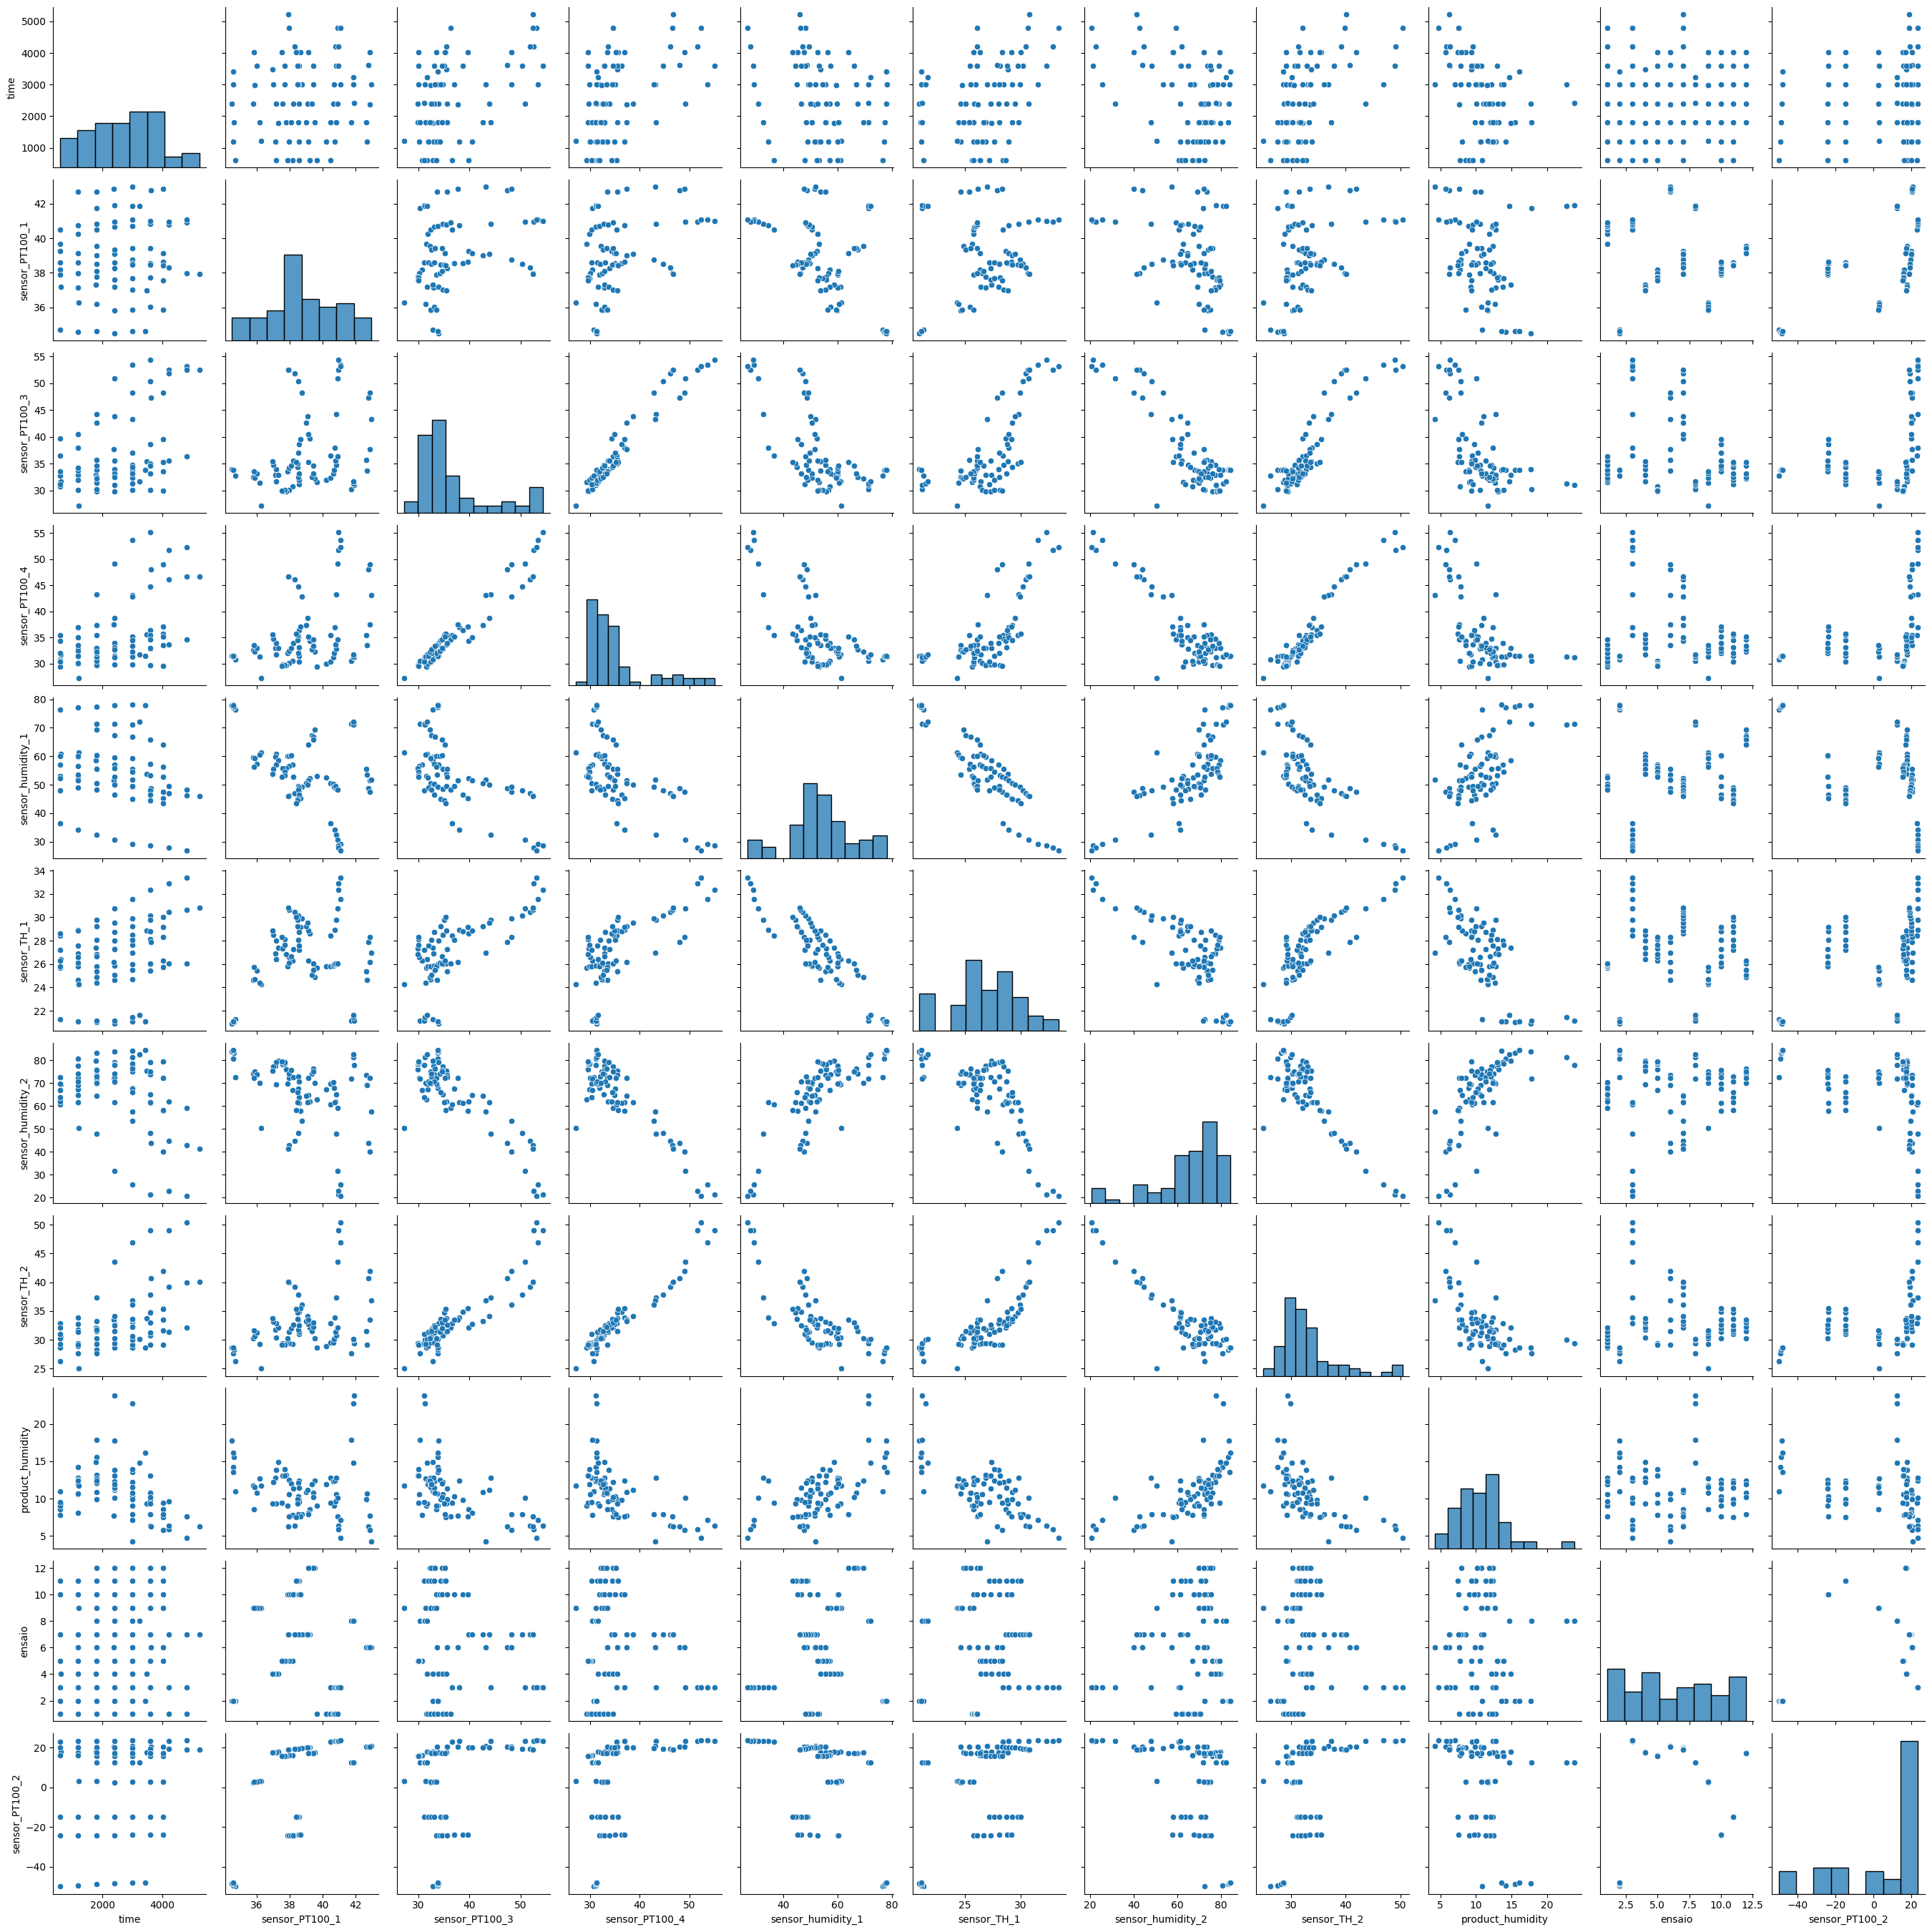

In [104]:
sns.pairplot(df)

# Getting the data ready

In [105]:
y = 'product_humidity'
X = list(df.columns)
X.pop(X.index(y))

# Removing useless columns (NaN and only identifier)
X_ = df[X].drop(columns=['sensor_PT100_2', 'ensaio'])
y_ = df[y]

# Linear regression with statsmodels 

In [106]:

exception_list = []

formula = y + ' ~ '
for i, col in enumerate(X):
    if (col in exception_list): continue
    if (i == 0): formula += col
    else: formula += f' + {col}'

lm = sm.ols(formula=formula, data=df)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:       product_humidity   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     9.699
Date:                Thu, 18 May 2023   Prob (F-statistic):           2.16e-09
Time:                        16:34:31   Log-Likelihood:                -157.24
No. Observations:                  71   AIC:                             336.5
Df Residuals:                      60   BIC:                             361.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            43.0184     17.68

In [107]:
from sklearn.neural_network import MLPRegressor

# Create the MLPRegressor and fit the data
mlp = MLPRegressor()
mlp.fit(X_, y_)

mlp.score(X_, y_)


-609.8883607769446

Mean of Residuals: -79.57811974080381


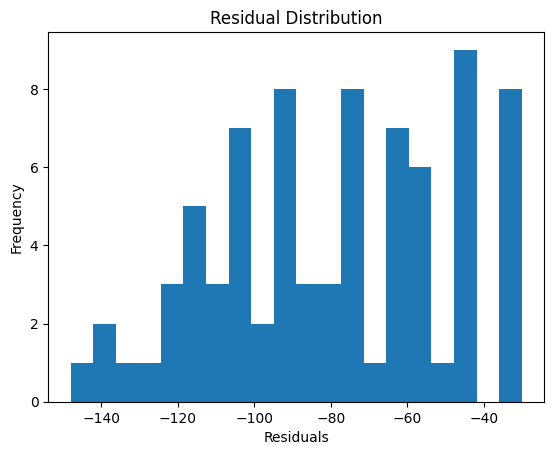

In [108]:
residuals = y_ - mlp.predict(X_)
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)
# Plot histogram of residuals
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

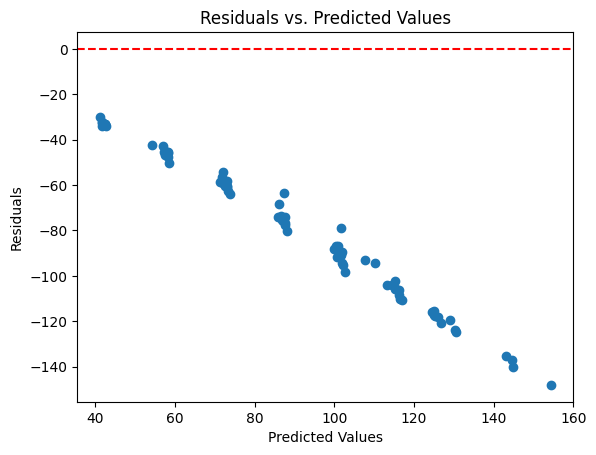

In [109]:
plt.scatter(mlp.predict(X_), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

# Neural network scikit-learn

In [110]:
from sklearn.neural_network import MLPRegressor

tries = 300
max_score = 0
best_model = ''

for i in range(tries):
    if (i%25 == 0): print(f'Progress: {i/tries*100:.2f}%')
    # Create the MLPRegressor with multiple hidden layers and more hidden units
    mlp = MLPRegressor(
        hidden_layer_sizes=[200,200,200],
        activation='tanh',
        solver='adam',
        max_iter=int(1e4))

    # Train the neural network
    mlp.fit(X_, y_)

    # Make predictions on the test set
    y_pred = mlp.predict(X_)

    score = mlp.score(X_, y_)
    if (max_score < score): 
        max_score = score
        best_model = mlp

Progress: 0.00%
Progress: 8.33%
Progress: 16.67%
Progress: 25.00%
Progress: 33.33%
Progress: 41.67%
Progress: 50.00%
Progress: 58.33%
Progress: 66.67%
Progress: 75.00%
Progress: 83.33%
Progress: 91.67%


In [111]:
print(f'Is {max_score*100:.2f}% right')

Is 89.37% right


Mean of Residuals: -0.36633979876294304


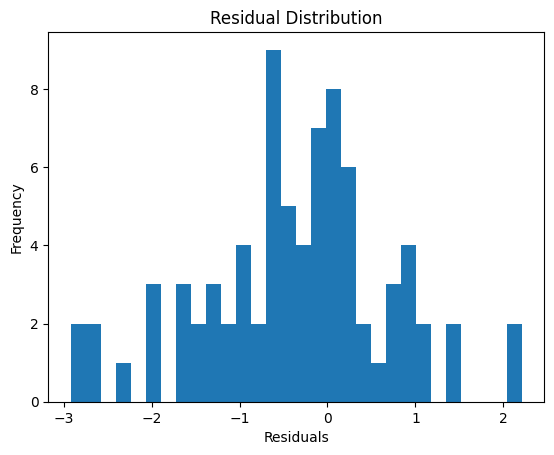

In [112]:
residuals = y_ - best_model.predict(X_)
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)
# Plot histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()

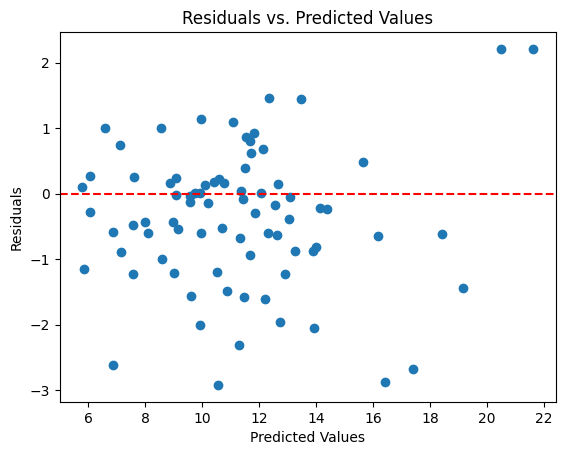

In [113]:
plt.scatter(best_model.predict(X_), residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()